In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter
import itertools
import nltk
from nltk.corpus import stopwords

In [2]:
dataset = 'Twitter-sentiment-self-drive-DFE.csv'

In [3]:
df = pd.read_csv(dataset)

In [4]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,our_id,sentiment_gold,sentiment_gold_reason,text
0,724227031,True,golden,236,NaN,5,0.7579,10001,5\n4,Author is excited about the development of the...,Two places I'd invest all my money if I could:...
1,724227032,True,golden,231,NaN,5,0.8775,10002,5\n4,Author is excited that driverless cars will be...,Awesome! Google driverless cars will help the ...
2,724227033,True,golden,233,NaN,2,0.6805,10003,2\n1,The author is skeptical of the safety and reli...,If Google maps can't keep up with road constru...
3,724227034,True,golden,240,NaN,2,0.8820,10004,2\n1,The author is skeptical of the project's value.,Autonomous cars seem way overhyped given the t...
4,724227035,True,golden,240,NaN,3,1.0000,10005,3,Author is making an observation without expres...,Just saw Google self-driving car on I-34. It w...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7156 entries, 0 to 7155
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               7156 non-null   int64  
 1   _golden                7156 non-null   bool   
 2   _unit_state            7156 non-null   object 
 3   _trusted_judgments     7156 non-null   int64  
 4   _last_judgment_at      7079 non-null   object 
 5   sentiment              7156 non-null   object 
 6   sentiment:confidence   7156 non-null   float64
 7   our_id                 7156 non-null   int64  
 8   sentiment_gold         77 non-null     object 
 9   sentiment_gold_reason  77 non-null     object 
 10  text                   7156 non-null   object 
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 566.2+ KB


In [6]:
df = df.drop(['_unit_id', '_golden', '_unit_state', '_trusted_judgments', '_last_judgment_at', 'our_id', 'sentiment_gold', 'sentiment_gold_reason'], axis='columns')

In [7]:
df

,sentiment,sentiment:confidence,text
0,5,0.7579,Two places I'd invest all my money if I could:...
1,5,0.8775,Awesome! Google driverless cars will help the ...
2,2,0.6805,If Google maps can't keep up with road constru...
3,2,0.8820,Autonomous cars seem way overhyped given the t...
4,3,1.0000,Just saw Google self-driving car on I-34. It w...
...,...,...,...
7151,not_relevant,0.5616,Washington DC metro trains are all self-drivin...
7152,not_relevant,0.7293,I think #DARPA works on autonomous drone techn...
7153,not_relevant,0.8854,I love the idea of driving myself to the denti...
7154,not_relevant,0.8431,Who likes cars these days? No me. Too expensiv...


In [8]:
df.sentiment.value_counts()

3               4245
4               1444
2                685
5                459
not_relevant     213
1                110
Name: sentiment, dtype: int64

In [9]:
df.loc[df['sentiment'] == 'not_relevant', 'sentiment'] = 0

In [10]:
df.sentiment.value_counts()

3    4245
4    1444
2     685
5     459
0     213
1     110
Name: sentiment, dtype: int64

In [11]:
df

,sentiment,sentiment:confidence,text
0,5,0.7579,Two places I'd invest all my money if I could:...
1,5,0.8775,Awesome! Google driverless cars will help the ...
2,2,0.6805,If Google maps can't keep up with road constru...
3,2,0.8820,Autonomous cars seem way overhyped given the t...
4,3,1.0000,Just saw Google self-driving car on I-34. It w...
...,...,...,...
7151,0,0.5616,Washington DC metro trains are all self-drivin...
7152,0,0.7293,I think #DARPA works on autonomous drone techn...
7153,0,0.8854,I love the idea of driving myself to the denti...
7154,0,0.8431,Who likes cars these days? No me. Too expensiv...


In [12]:
df['sentiment'] = df['sentiment'].apply(pd.to_numeric, errors='coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7156 entries, 0 to 7155
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sentiment             7156 non-null   int64  
 1   sentiment:confidence  7156 non-null   float64
 2   text                  7156 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 167.8+ KB


In [14]:
def remove_urls(text):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """
    return re.sub('([^0-9A-Za-z \t])|(\w+:\/\/\S+)', '', text)

In [15]:
df['text'] = df.text.apply(remove_urls).str.lower()

In [16]:
df['tokens'] = df['text'].str.split()

In [17]:
df

,sentiment,sentiment:confidence,text,tokens
0,5,0.7579,two places id invest all my money if i could 3...,"[two, places, id, invest, all, my, money, if, ..."
1,5,0.8775,awesome google driverless cars will help the b...,"[awesome, google, driverless, cars, will, help..."
2,2,0.6805,if google maps cant keep up with road construc...,"[if, google, maps, cant, keep, up, with, road,..."
3,2,0.8820,autonomous cars seem way overhyped given the t...,"[autonomous, cars, seem, way, overhyped, given..."
4,3,1.0000,just saw google selfdriving car on i34 it was ...,"[just, saw, google, selfdriving, car, on, i34,..."
...,...,...,...,...
7151,0,0.5616,washington dc metro trains are all selfdriving...,"[washington, dc, metro, trains, are, all, self..."
7152,0,0.7293,i think darpa works on autonomous drone techno...,"[i, think, darpa, works, on, autonomous, drone..."
7153,0,0.8854,i love the idea of driving myself to the denti...,"[i, love, the, idea, of, driving, myself, to, ..."
7154,0,0.8431,who likes cars these days no me too expensive ...,"[who, likes, cars, these, days, no, me, too, e..."


In [82]:
sentence_lengths = [len(tokens) for tokens in df['tokens']]
vocab = sorted(list(set([word for tokens in df['tokens'] for word in tokens])))

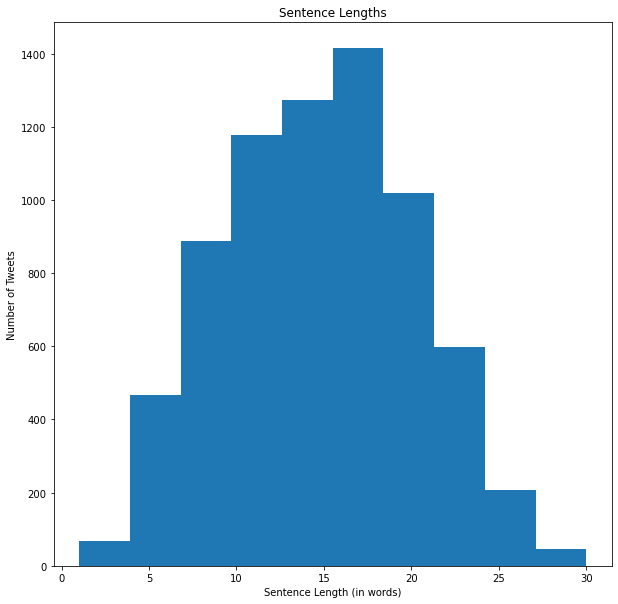

In [81]:
plt.figure(figsize = (10,10))
plt.xlabel('Sentence Length (in words)')
plt.ylabel('Number of Tweets')
plt.title('Sentence Lengths')
plt.hist(sentence_lengths)
plt.show()

In [80]:
print('Words in vocab: ', len(vocab))

Words in vocab:  12224


In [87]:
all_words = sorted(list([word for tokens in df['tokens'] for word in tokens]))

In [95]:
mc_words = pd.DataFrame(Counter(all_words).most_common(20), columns=['words', 'count'])

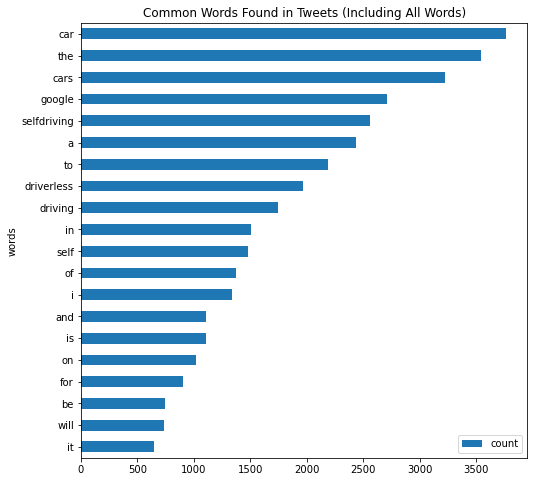

In [98]:
fig, ax = plt.subplots(figsize=(8, 8))
mc_words.sort_values(by='count', ascending='False').plot(kind='barh', x='words', ax=ax)
ax.set_title("Common Words Found in Tweets (Including All Words)")
plt.show()

In [101]:
stopwords_en = set(stopwords.words('english'))

In [102]:
all_words_nsw = [word for word in all_words if word not in stopwords_en]

In [103]:
mc_words_nsw = pd.DataFrame(Counter(all_words_nsw).most_common(20), columns=['words', 'count'])

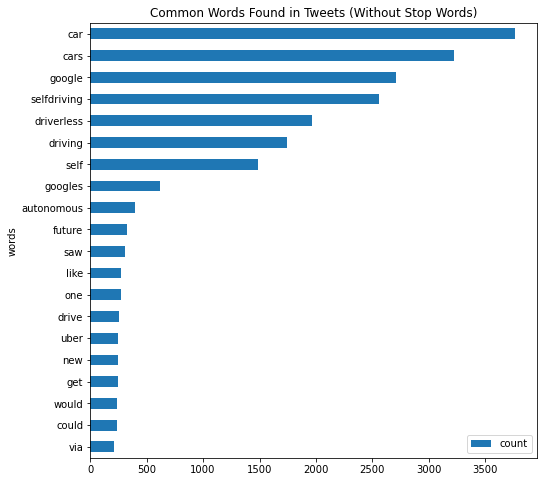

In [104]:
fig, ax = plt.subplots(figsize=(8, 8))
mc_words_nsw.sort_values(by='count', ascending='False').plot(kind='barh', x='words', ax=ax)
ax.set_title("Common Words Found in Tweets (Without Stop Words)")
plt.show()